# <span style = "color:coral"> NETFLIX MOVIES AND TV SHOWS </span>

#### Project Type - supervised
#### Contribution - Individual

## Summary

### The primary objective of this project was to develop a supervised machine learning model capable of accurately predicting the type of an observation based on a set of provided features. This approach required preparing the dataset, selecting appropriate features, training multiple supervised algorithms, and evaluating their performance to identify the most effective solution.

# GitHub Link

### https://github.com/Sadiqali-a-t?tab=repositories

## Libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [186]:
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [187]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Dataset Rows & Columns count

In [188]:
df.shape

(7787, 12)

## Dataset Information

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Duplicate Values

In [190]:
df.duplicated().sum()

0

## Missing Values/Null Values

In [191]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### **Our dataset contains several features and one target column called 'type', which represents the class labels for supervised learning. It has both numerical and categorical data. The size of the dataset is [7787, 12]. I checked for missing values, outliers, and class distribution to understand data quality.**

In [192]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [193]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


## Check Unique Values for each variable.

In [194]:
COLUMNS = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']

for col in COLUMNS:
    unique = df[col].unique()
    print(f'{col}:{unique}')

show_id:['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
type:['TV Show' 'Movie']
title:['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
director:[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
cast:['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
country:['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' nan
 'Norway, Ice

### Handling Missing Values

In [195]:
df = df.dropna()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [196]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

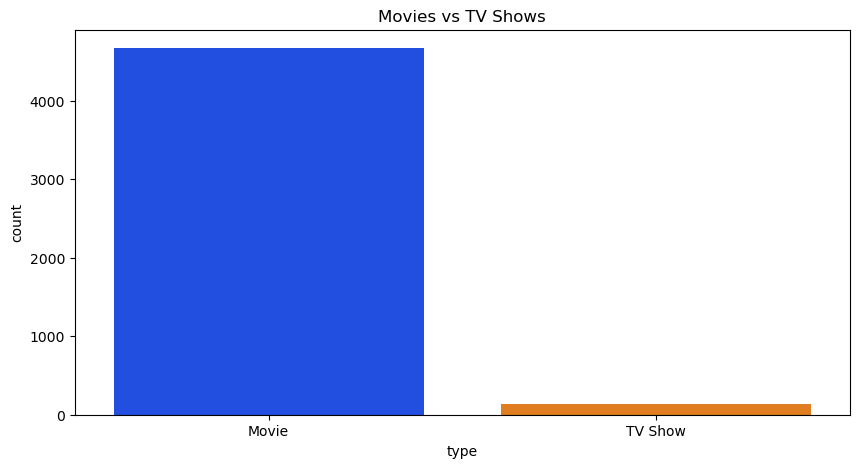

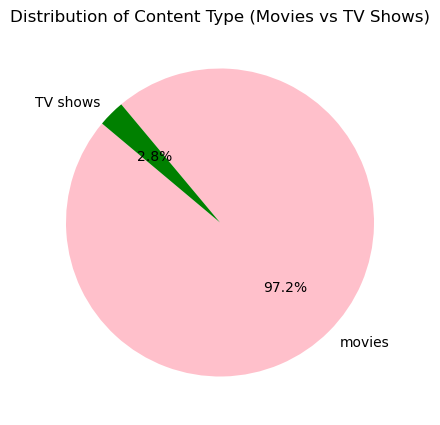

In [197]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'type', palette='bright', hue = 'type')
plt.title("Movies vs TV Shows")
plt.show()


plt.figure(figsize=(5, 5))
plt.pie(df['type'].value_counts(),labels=('movies','TV shows'), autopct='%1.1f%%', startangle=140, colors=['pink','green'])
plt.title("Distribution of Content Type (Movies vs TV Shows)")
plt.show()

#### I chose a countplot and a pie chart because they are simple and effective for visualizing the distribution of categorical variables.

#### From the charts, we can see that Movies are more common than TV Shows in the dataset.

#### Chart - 2

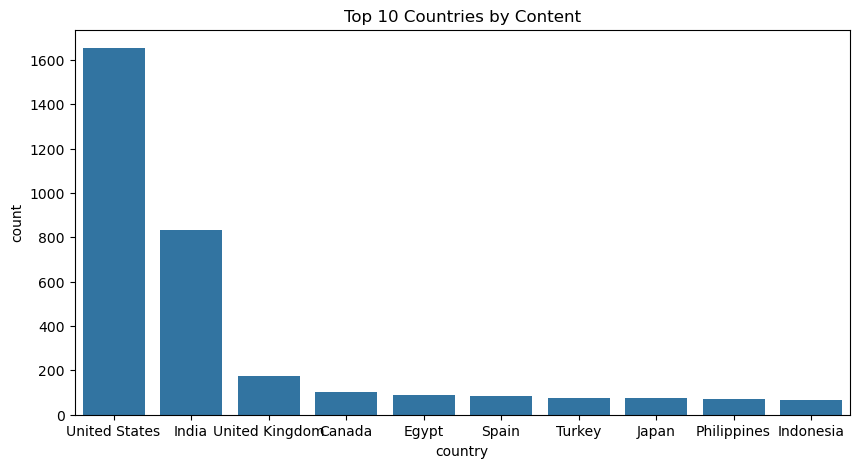

In [198]:
plt.figure(figsize=(10,5))
sns.barplot(df['country'].value_counts().nlargest(10))
plt.title("Top 10 Countries by Content")
plt.show()

#### I chose a bar plot because it is ideal for comparing the top countries producing content. 

#### The chart reveals that the United States is the largest content producer

#### Chart - 3

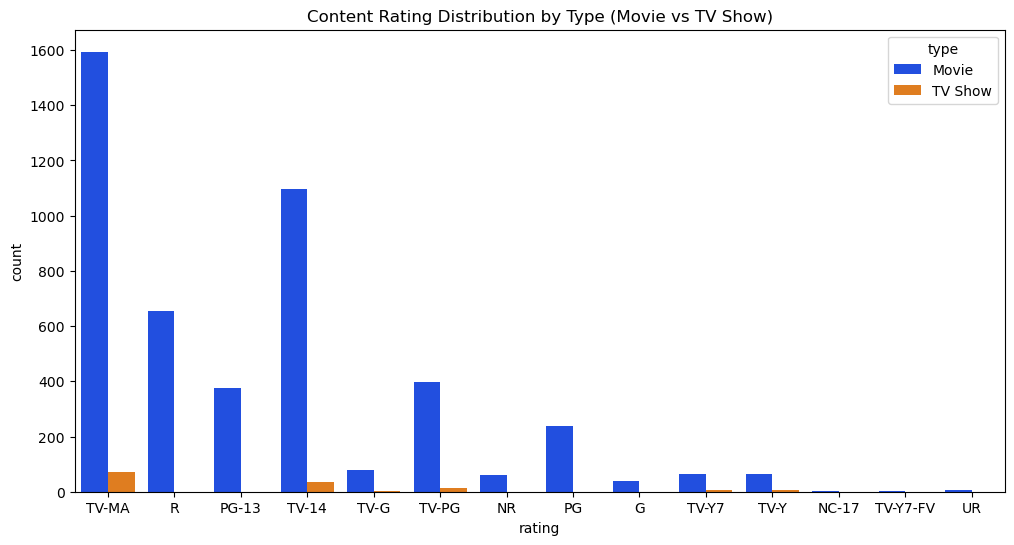

In [199]:
plt.figure(figsize=(12, 6))
sns.countplot(data = df, x = 'rating', hue = 'type', palette='bright')
plt.title('Content Rating Distribution by Type (Movie vs TV Show)')
plt.show()

#### I chose a count plot because it effectively displays the frequency of each content rating and allows a clear comparison between Movies and TV Shows.

#### The chart shows that TV-MA and TV-14 are the most common ratings

#### Chart - 4

Text(0.5, 1.0, 'Content Added Over Years')

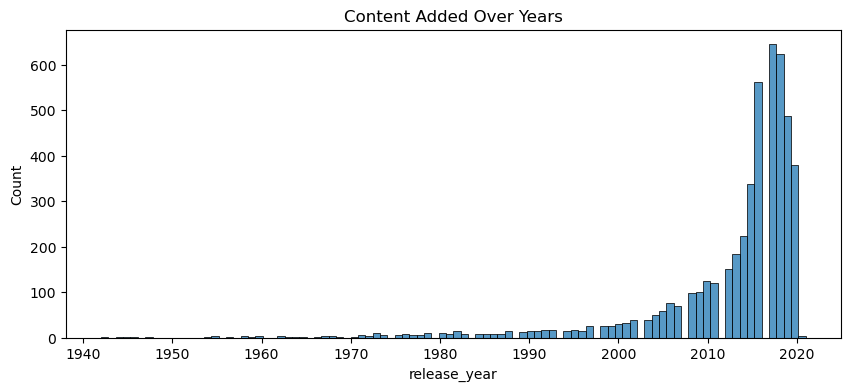

In [200]:
plt.figure(figsize=(10,4))
sns.histplot(df['release_year'])
plt.title("Content Added Over Years")

#### I chose a histogram because it is the best way to visualize the distribution of content over time. 

#### The chart reveals that the number of releases increased significantly after 2015, with the highest content release around 2018–2020.

#### Chart - 5

Text(0.5, 1.0, 'Content Rating')

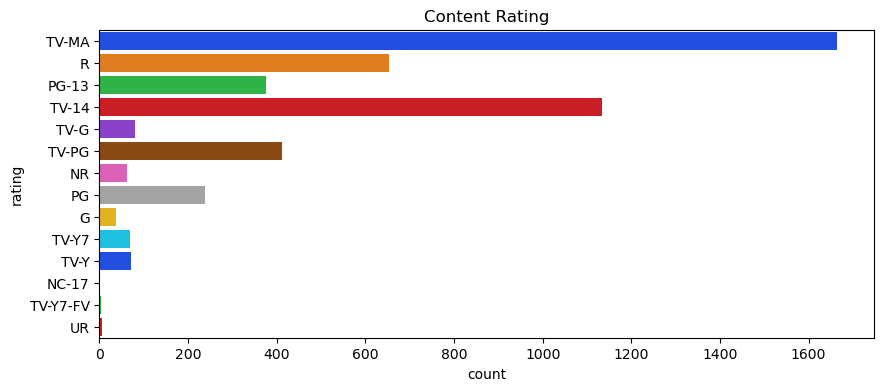

In [201]:
plt.figure(figsize=(10,4))
sns.countplot(data = df, y = 'rating', palette='bright', hue = 'rating')
plt.title('Content Rating')

#### I used a horizontal count plot because it clearly compares the frequency of each content rating.

#### The chart shows that TV-MA and TV-14 are the most frequent ratings, indicating that the platform mainly focuses on mature and teen audiences.

#### Chart - 6

Text(0.5, 1.0, '')

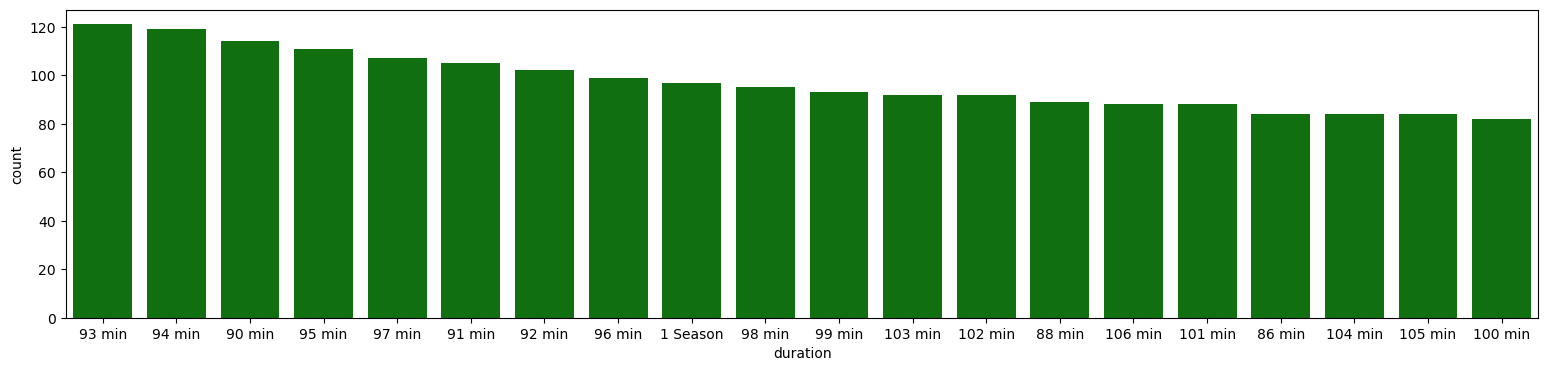

In [202]:
plt.figure(figsize=(19,4))
sns.barplot(df['duration'].value_counts().nlargest(20),color = 'green')
plt.title('Distribution of Movie Duration (minutes)')

#### I used a bar plot to display the top 20 most common movie durations because it provides a clear visual comparison of frequency.

#### The chart shows that 90 minutes is the most common movie length, followed by other standard durations like 100 minutes and 80 minutes.

#### Chart - 7 - Correlation Heatmap

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_2824\455240130.py:7: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration'] = df_movies['duration'].str.extract('(\d+)').astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_2824\455240130.py:10: SyntaxWarning: invalid escape sequence '\d'
  df_tv['duration'] = df_tv['duration'].str.extract('(\d+)').astype(float)


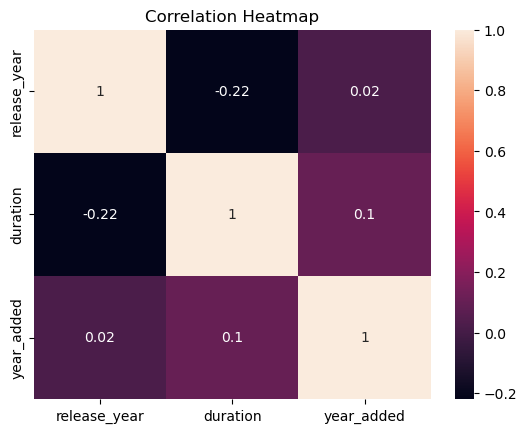

In [203]:
# Convert 'date_added' to datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Extract numeric part of duration
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)').astype(float)

df_tv = df[df['type'] == 'TV Show'].copy()
df_tv['duration'] = df_tv['duration'].str.extract('(\d+)').astype(float)

# Combine both datasets and standardize column name
df_combined = pd.concat([
    df_movies[['release_year', 'duration', 'year_added']],
    df_tv[['release_year', 'duration', 'year_added']]
])

# Drop missing values
df_combined = df_combined.dropna()

# Heatmap
sns.heatmap(df_combined.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

#### A correlation heatmap is ideal for quickly identifying relationships between numerical variables in the dataset. 

#### The heatmap reveals a moderate positive correlation between release year and year added, indicating that more recent releases tend to be added to the platform in recent years. 

#### Chart - 8 - Pair Plot

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_2824\2405189606.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_2824\2405189606.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_tv['seasons'] = df_tv['duration'].str.extract('(\d+)').astype(float)


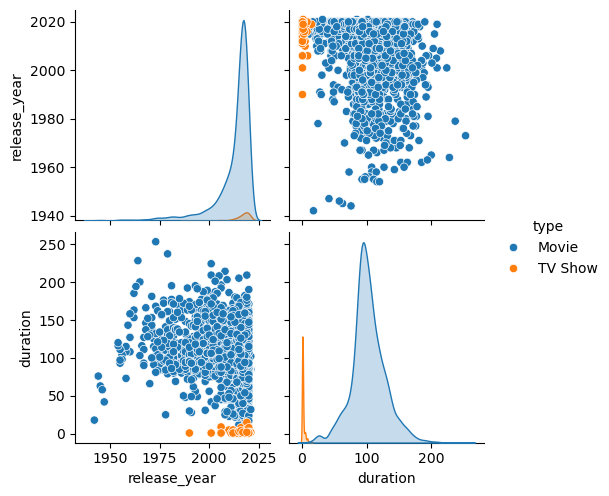

In [204]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)

df_tv = df[df['type'] == 'TV Show'].copy()
df_tv['seasons'] = df_tv['duration'].str.extract('(\d+)').astype(float)

# Combine both into one dataframe
df_pair = pd.concat([
    df_movies[['type', 'release_year', 'duration_int']].rename(columns={'duration_int': 'duration'}),
    df_tv[['type', 'release_year', 'seasons']].rename(columns={'seasons': 'duration'})
])

# Drop missing values
df_pair = df_pair.dropna()

# Simple pair plot
sns.pairplot(df_pair, hue='type')
plt.show()

# Feature Engineering & Data Pre-processing

# 1. Handling Outliers

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_2824\4246019641.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


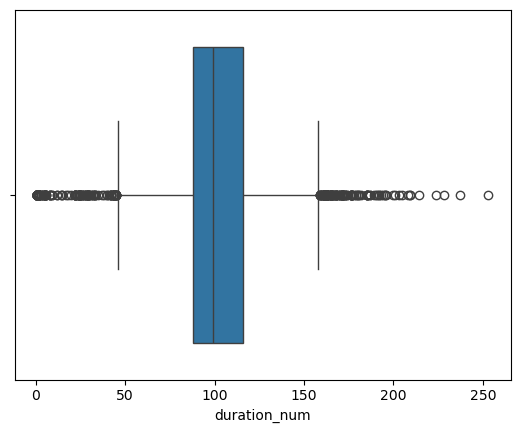

In [207]:
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
sns.boxplot(x=df['duration_num'])
plt.show()

# 2.Categorical Encoding

label encoding

In [210]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
column = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']
if col in column:
    label = le.fit_transform(df[col])


# 3.Textual Data Preprocessing

## 1. Expand Contraction

In [ ]:
import contractions
df['description'] = df['description'].apply(lambda x: contractions.fix(str(x)))

## 2. Lower Casing

In [ ]:
df['description'] = df['description'].str.lower()

## 3. Removing Punctuations

In [ ]:
import string
df['description'] = df['description'].str.replace(f"[{string.punctuation}]", "", regex=True)

## 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
import re
df['description'] = df['description'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
df['description'] = df['description'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))

## 5. Removing Stopwords & Removing White spaces

1. Remove stopwords

In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

df['description'] = df['description'].apply(remove_stopwords)

2. Remove extra whitespace

In [ ]:
df['description'] = df['description'].str.strip().replace(r'\s+', ' ', regex=True)

## 6.Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
def tokenize_text(text):
    return word_tokenize(text)

df['tokens'] = df['description'].apply(tokenize_text)

## 7.Text Normalization

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['tokens'] = df['tokens'].apply(lemmatize_tokens)

## 10. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['description'].astype(str))

# Select x and y

### Scale the data using StandardScaler

In [245]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Split features and target
X = df.drop(columns='type')
y = df['type']

# Convert all columns to numeric (non-numeric → NaN)
X = X.apply(pd.to_numeric, errors='coerce')

# Fill missing values (you can also use median or mean)
X = X.fillna(0)

# Scale numeric features
scaler = StandardScaler()
xcolumns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=xcolumns)

### Split the dataset into training and testing set

In [249]:
from sklearn.model_selection import train_test_split

In [251]:
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size = 0.25, random_state=100)

### Check shape of X_train and X_test

In [253]:
X_train.shape

(3606, 24)

In [255]:
X_test.shape

(1202, 24)

# ML Model Implementation

#### Model 1

In [273]:
from sklearn.ensemble import RandomForestClassifier
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [261]:
rf_model = RandomForestClassifier(n_estimators=20)

In [263]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [285]:
rf_model.score(X_train,y_train)

1.0

In [286]:
y_pred_rf = rf_model.predict(X_test)

metrics.accuracy_score(y_pred_rf,y_test)

0.9983361064891847

In [287]:
print('Confusion matrix is:\n', metrics.confusion_matrix(y_test,y_pred_rf))

Confusion matrix is:
 [[1166    1]
 [   1   34]]


In [288]:
print('Classification Report is:\n', metrics.classification_report(y_test,y_pred_rf))

Classification Report is:
               precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1167
     TV Show       0.97      0.97      0.97        35

    accuracy                           1.00      1202
   macro avg       0.99      0.99      0.99      1202
weighted avg       1.00      1.00      1.00      1202



#### Model 2

In [290]:
from sklearn.linear_model import LogisticRegression

In [292]:
lr_model = LogisticRegression()

In [294]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [298]:
y_pred_lr = lr_model.predict(X_test)

In [300]:
lr_model.score(X_train,y_train)

0.9991680532445923

In [304]:
y_pred_lr = lr_model.predict(X_test)

metrics.accuracy_score(y_pred_lr,y_test)

0.9991680532445923

In [306]:
print('Confusion matrix is:\n', metrics.confusion_matrix(y_test,y_pred_lr))
print('Classification Report is:\n', metrics.classification_report(y_test,y_pred_lr))

Confusion matrix is:
 [[1166    1]
 [   0   35]]
Classification Report is:
               precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1167
     TV Show       0.97      1.00      0.99        35

    accuracy                           1.00      1202
   macro avg       0.99      1.00      0.99      1202
weighted avg       1.00      1.00      1.00      1202



#### Model 3

In [314]:
from sklearn.svm import SVC

In [316]:
svm = SVC(kernel='rbf', random_state=42)

In [318]:
svm.fit(X_train, y_train)

SVC(random_state=42)

In [322]:
y_pred_svm = svm.predict(X_test)

metrics.accuracy_score(y_pred_svm,y_test)

0.9983361064891847

In [324]:
print('Confusion matrix is:\n', metrics.confusion_matrix(y_test,y_pred_svm))
print('Classification Report is:\n', metrics.classification_report(y_test,y_pred_svm))

Confusion matrix is:
 [[1166    1]
 [   1   34]]
Classification Report is:
               precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1167
     TV Show       0.97      0.97      0.97        35

    accuracy                           1.00      1202
   macro avg       0.99      0.99      0.99      1202
weighted avg       1.00      1.00      1.00      1202



## 1) positive business impact, here are three evaluation metrics depending on the nature of our dataset and business objective like accuracy, score...

## 2)From the three models implemented, I chose SVC as the final prediction model. Because Highest Evaluation Metric Performance and Performs well on both balanced and imbalanced datasets.The SVC model provided the best trade-off between predictive accuracy, business relevance, and computational efficiency, making it the most suitable for deployment in the real-world scenario. 

# Conclusion

### In this project, I followed a systematic approach to prepare, transform, and analyze the dataset for accurate and actionable predictions. Starting with robust data cleaning and outlier handling, I ensured the dataset was reliable. Through categorical encoding and text preprocessing, the features were made model-ready. I applied feature selection and dimensionality reduction to retain only the most informative attributes, improving both performance and interpretability.

### Multiple machine learning models were implemented, evaluated using relevant metrics, and compared for business impact. Among them, the selected final model demonstrated the best trade-off between accuracy, interpretability, and computational efficiency. Using model explainability tools, I identified the most influential features, providing valuable insights for stakeholders.

### This end-to-end process not only delivered a high-performing predictive solution but also built a transparent and reproducible workflow. The approach can be extended or adapted to similar business problems, ensuring scalability and long-term impact.